## **Zonal Stats: Exploring spectra by land cover**

#### Reflection exercises for each group:

**Brief Summary:**

In this project, we explore a dataset in detail, focusing on spectral data and land cover classification. We start by selecting and examining the dataset's projection, metadata, data types, and resolution. Using Google Earth Engine (GEE), we import NEON dataset and filter the SOAP dataset for 2019, create a region of interest (ROI), and clip the data accordingly. We then bring in National Land Cover Database (NLCD) data for further analysis. The main task involves grouping pixels by land cover type and calculating the average spectral signature for each type using the reduceRegion function. This data is transformed into a pandas DataFrame for easier manipulation and plotting. Finally, we visualize the spectral signatures of different land cover types using AOP, allowing us to see the average reflectance values across different wavelengths.



1. At the top of the Colab notebook that you share with everyone, please include your responses to the following questions:


  - **Choose at least 1 dataset to explore in more detail.**

      NLCD (the National Land Cover Database) is a 30-m Landsat-based land cover database spanning 8 epochs (2001, 2004, 2006, 2008, 2011, 2013, 2016, and 2019).The images rely on the imperviousness data layer for the urban classes and on a decision-tree classification for the rest.

      [NCLD Datasets](https://www.sciencebase.gov/catalog/item/5f21cef582cef313ed940043)



  - **What is the projection for this dataset?**

      Projection Information for B053: {'type': 'Projection', 'crs': 'EPSG:32611', 'transform': [1, 0, 292000, 0, -1, 4110000]}

      Codes (below)


 - **Where can you find more information on how the data were collected and how to interpret the metadata?**

      [ImageCollection Information and Metadata](https://developers.google.com/earth-engine/guides/ic_info)

    from the code, we extracted the metadata, following the metadata link, we got to the neon website for the image that includes information on resolution, how data was collected.


  - **Think about what data type each variable is**.

       In the metadata information for each band shows data type showing pixel type, min, max, precision

      
  - **Is it vector or raster data? What properties exist for each dataset?**

      [Raster to Vector Conversion](https://developers.google.com/earth-engine/guides/reducers_reduce_to_vectors)

      It is a Raster data.
      To determine the geometry of the 'region of interest', 'reducetovector' function was used to convert the raster to vector data.

      For the raster data, the property was metadata.
      For the vector data, geometry.

  - **What resolution are your data?**

      Resolution: 30 meters The National Land Cover Database (NLCD) data generally has a spatial resolution of 30 meters, meaning each pixel represents a 30m x 30m area on the ground. SOAP Hyperspectral Data (aopSDR):

      Resolution: 1 meter NEON's Airborne Observation Platform (AOP) collects hyperspectral imagery at a high resolution, typically around 1 meter, meaning each pixel represents a 1m x 1m area. SOAP RGB Data (aopRGB):

      Resolution: 10 cm (0.1 meter) NEON's RGB imagery is collected at an even higher resolution, often around 10 centimeters, meaning each pixel represents a 10cm x 10cm area.

2. **At the top of the Colab notebook, write a short summary detailing the processing steps in the notebook and your results.**

    In the first code trunk, we set up the necessary package for our workspace and use our id for authentication.

    Next, we import our data: from NEON 2019- we import 2 data type and named them SOAP_2019_sdr and SOAP_2019_rgb

    Choose at least 1 dataset to explore in more detail.- We  looked at SOAP_2019_sdr. From the code, we can see the projection information.

    1.1. What is the projection for this dataset?-  Projection of band B053 is crs (coordinate reference system) : EPSG:32611 (which means, WGS 84 UTM zone 11N).

    1.2. Where can you find more information on how the data were collected and how to interpret the metadata?- from the code, we extracted the metadata, following the metadata link, we got to the neon website for the image that includes information on resolution, how data was collected.

    1.3. Think about what data type each variable is.- in the metadata information for each band shows data type showing pixel type, min, max, precision

    1.4. Is it vector or raster data? What properties exist for each dataset?- Raster data. For properties, there are 18 elements for SOAP_2019_rgb which includes flight year, Neon domain, sensor name.

    1.5. What resolution is your data? spatial resolution is at least 0.1 m.



  - **Although these topics may be far removed from your own interests, how could these steps and analyses help in your own work?**

      We found the clipping area code is useful for us to make a map of our study areas, which includes all attributes that we want. For example, our group can now find data sources and build a map that contains information about climate change observations/landscape changes observations/phenology observations recorded from local communities or maps that show socio-economic and cultural factors.

      Adding from this exercise, we are thinking about adding data to analyze how land use changes over time, forest classification and forest change, and create habitat classification for our own interest species.


3. **OPTIONAL - Expand your script by adding additional processing, analysis, or other data.**

As you're working through your exercise, **add code chunks to further document your scripts. Add additional comments to the code itself to clarify complicated processes.**



**#Question 2: Summary our process:**



#Question 3: Codes added




In [ ]:
#1.3 [Getting Metadata](https://developers.google.com/earth-engine/guides/image_info)


# Load an image.
image = ee.Image('LANDSAT/LC08/C02/T1/LC08_044034_20140318')

# All metadata.
display('All metadata:', image)

# Get information about the bands as a list.
band_names = image.bandNames()
display('Band names:', band_names)  # ee.List of band names

# Get projection information from band 1.
b1_proj = image.select('B1').projection()
display('Band 1 projection:', b1_proj)  # ee.Projection object

# Get scale (in meters) information from band 1.
b1_scale = image.select('B1').projection().nominalScale()
display('Band 1 scale:', b1_scale)  # ee.Number

# Note that different bands can have different projections and scale.
b8_scale = image.select('B8').projection().nominalScale()
display('Band 8 scale:', b8_scale)  # ee.Number

# Get a list of all metadata properties.
properties = image.propertyNames()
display('Metadata properties:', properties)  # ee.List of metadata properties

# Get a specific metadata property.
cloudiness = image.get('CLOUD_COVER')
display('CLOUD_COVER:', cloudiness)  # ee.Number

# Get version number (ingestion timestamp as microseconds since Unix epoch).
version = image.get('system:version')
display('Version:', version)  # ee.Number
display(
    'Version (as ingestion date):',
    ee.Date(ee.Number(version).divide(1000)).format(),
)  # ee.Date

# Get the timestamp.
ee_date = ee.Date(image.get('system:time_start'))
display('Timestamp:', ee_date)  # ee.Date

# Date objects transferred to the client are milliseconds since UNIX epoch;
# convert to human readable date with ee.Date.format().
display('Datetime:', ee_date.format())  # ISO standard date string

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-55-57a5c8c54c0c>, line 1)

[ImageCollection Information and Metadata](https://developers.google.com/earth-engine/guides/ic_info)

In [ ]:
# Load a Landsat 8 ImageCollection for a single path-row.
collection = (
    ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')
    .filter(ee.Filter.eq('WRS_PATH', 44))
    .filter(ee.Filter.eq('WRS_ROW', 34))
    .filterDate('2014-03-01', '2014-08-01')
)
display('Collection:', collection)

# Get the number of images.
count = collection.size()
display('Count:', count)

# Get the date range of images in the collection.
range = collection.reduceColumns(ee.Reducer.minMax(), ['system:time_start'])
display('Date range:', ee.Date(range.get('min')), ee.Date(range.get('max')))

# Get statistics for a property of the images in the collection.
sun_stats = collection.aggregate_stats('SUN_ELEVATION')
display('Sun elevation statistics:', sun_stats)

# Sort by a cloud cover property, get the least cloudy image.
image = ee.Image(collection.sort('CLOUD_COVER').first())
display('Least cloudy image:', image)

# Limit the collection to the 10 most recent images.
recent = collection.sort('system:time_start', False).limit(10)
display('Recent images:', recent)

In [ ]:
1.2 Projection Information for B053: {'type': 'Projection', 'crs': 'EPSG:32611', 'transform': [1, 0, 292000, 0, -1, 4110000]}

Code (below):

In [ ]:
# Default projection python code.
collection = ee.ImageCollection('projects/neon-prod-earthengine/assets/DP3-30006-001')
mosaic = collection.filterDate('2019-01-01', '2019-12-31').mosaic()
print(mosaic.projection())

In [ ]:
# Function to get projection and metadata info for a specific band
def print_band_info(image, band_name):
    band = image.select(band_name)
    projection_info = band.projection().getInfo()
    metadata_info = band.getInfo()

    print(f"Projection Information for {band_name}: {projection_info}")
    print(f"Metadata Information for {band_name}: {metadata_info}")
    print("\n")

# Print projection and metadata info for bands B053, B035, B019
bands = ['B053', 'B035', 'B019']
for band in bands:
    print_band_info(SOAP_2019_sdr, band)



############Getting information about metadata and how the data were collected###########
# Get a list of all metadata properties for SOAP_2019_rgb.
properties = SOAP_2019_rgb.propertyNames()
display('Metadata properties for SOAP_2019_rgb:', properties)  # ee.List of metadata properties
print('Metadata properties for SOAP_2019_sdr:', properties.getInfo())


display('All metadata:', SOAP_2019_rgb)

Find resolution information by following link in properties section "NEON_DATA_PROD_URL: https://data.neonscience.org/data-products/DP3.30010.001"

In [ ]:
#Raster Vector Conversion
# Load a Japan boundary from the Large Scale International Boundary dataset.
japan = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017') \
  .filter(ee.Filter.eq('country_na', 'Japan'))

# Load a 2012 nightlights image, clipped to the Japan border.
nl2012 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182012') \
  .select('stable_lights') \
  .clipToCollection(japan)

# Define arbitrary thresholds on the 6-bit nightlights image.
zones = nl2012.gt(30).add(nl2012.gt(55)).add(nl2012.gt(62))
zones = zones.updateMask(zones.neq(0))

# Convert the zones of the thresholded nightlights to vectors.
vectors = zones.addBands(nl2012).reduceToVectors(**{
  'geometry': japan,
  'crs': nl2012.projection(),
  'scale': 1000,
  'geometryType': 'polygon',
  'eightConnected': False,
  'labelProperty': 'zone',
  'reducer': ee.Reducer.mean()
})

# Display the thresholds.
m.setCenter(139.6225, 35.712, 9)
m.addLayer(zones, {'min': 1, 'max': 3, 'palette': ['0000FF', '00FF00', 'FF0000']}, 'raster')

# Make a display image for the vectors, add it to the map.
display = ee.Image(0).updateMask(0).paint(vectors, '000000', 3)
m.addLayer(display, {'palette': '000000'}, 'vectors')



---



**Start Running Code From Here**

### Grouping pixels by land cover type

In this section, we'll group pixels by landcover type, and then plot the average spectral signature for each landcover type. We'll be using the GEE function reduceRegion to get the average value for each band by landcover type.

This project was inpsired by the following NEON Tutorial: [Spectral signatures by NDVI threshold in Python](https://www.neonscience.org/resources/learning-hub/tutorials/calc-refl-ndvi-py). Check it out (or any of their other awesome tutorials!) to learn more!


In [ ]:
import ee
import geemap
import geemap.colormaps as cm
ee.Authenticate()
ee.Initialize(project='238308207130')
geemap.ee_initialize(project='238308207130')

In [ ]:
# Import SOAP data
aopSDR = ee.ImageCollection('projects/neon-prod-earthengine/assets/DP3-30006-001')
SOAP_2019_sdr = aopSDR \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()

# Function to get projection and metadata info for a specific band
def print_band_info(image, band_name):
    band = image.select(band_name)
    projection_info = band.projection().getInfo()
    metadata_info = band.getInfo()

    print(f"Projection Information for {band_name}: {projection_info}")
    print(f"Metadata Information for {band_name}: {metadata_info}")
    print("\n")

# Print projection and metadata info for bands B053, B035, B019
bands = ['B053', 'B035', 'B019']
for band in bands:
    print_band_info(SOAP_2019_sdr, band)

aopRGB = ee.ImageCollection('projects/neon-prod-earthengine/assets/DP3-30010-001')
SOAP_2019_rgb = aopRGB \
  .filterDate('2019-01-01', '2019-12-31') \
  .filterMetadata('NEON_SITE', 'equals', 'SOAP') \
  .first()


# Create our region of interest (ROI)
full_mask = ee.Image.constant(1).clip(SOAP_2019_sdr.geometry()) \
                .updateMask(SOAP_2019_sdr.select(['B001']).mask()) \
                .reduceToVectors(maxPixels=1e13, scale=100)
ROI = full_mask.geometry().buffer(-30)

# Import NLCD data, clip to SOAP
NLCD = ee.ImageCollection("USGS/NLCD_RELEASES/2021_REL/NLCD") \
          .filterBounds(ROI) \
          .first() \
          .clip(ROI)
# Set up visualization params
RGB_bands = ['B053', 'B035', 'B019'] # These are the band names for the red, green, blue bands in the SDR data
rgbVis = {'min': 0, 'max': 255, 'gamma': 0.8} # This sets a nice range of values for mapping the RGB data

Projection Information for B053: {'type': 'Projection', 'crs': 'EPSG:32611', 'transform': [1, 0, 292000, 0, -1, 4110000]}
Metadata Information for B053: {'type': 'Image', 'bands': [{'id': 'B053', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [15000, 15000], 'crs': 'EPSG:32611', 'crs_transform': [1, 0, 292000, 0, -1, 4110000]}], 'version': 1680167046032884, 'id': 'projects/neon-prod-earthengine/assets/DP3-30006-001/2019_SOAP_4_SDR', 'properties': {'WL_FWHM_B200': '1378.1302,5.5474', 'WL_FWHM_B321': '1984.0948,5.7283', 'WL_FWHM_B320': '1979.087,5.7264', 'WL_FWHM_B202': '1388.1461,5.5495', 'WL_FWHM_B323': '1994.1108,5.7323', 'WL_FWHM_B201': '1383.1382,5.5485', 'WL_FWHM_B322': '1989.1028,5.7303', 'WL_FWHM_B204': '1398.1621,5.5516', 'WL_FWHM_B325': '2004.1268,5.7363', 'WL_FWHM_B203': '1393.154,5.5506', 'WL_FWHM_B324': '1999.1187,5.7343', 'WL_FWHM_B206': '1408.178,5.5537', 'WL_FWHM_B327': '2014.1428,5.7403', 'WL_FWHM_B205': '1403.17,5.5527

In [ ]:
# View NLCD data for SOAP
m = geemap.Map()
m.addLayer(SOAP_2019_rgb, rgbVis, 'SOAP 2019 RGB')
m.addLayer(NLCD.select('landcover'), None, 'landcover')
m.centerObject(ROI, 10)
m

Map(center=[37.04747501794362, -119.25028695888535], controls=(WidgetControl(options=['position', 'transparent…

In [ ]:
import numpy as np    # import additional packages for dataframe manipulation, plotting in python
import pandas as pd
import seaborn as sns

# Select the WL_FWHM_B*** band properties (using regex)
properties = SOAP_2019_sdr.toDictionary()
wl_fwhm_dict = properties.select(['WL_FWHM_B+\d{3}'])

# Pull out the wavelength, fwhm values to a list
wl_fwhm_list = wl_fwhm_dict.values()

# Function to pull out the wavelength values only and convert the string to float
def get_wavelengths(x):
  str_split = ee.String(x).split(',')
  first_elem = ee.Number.parse((str_split.get(0)))
  return first_elem

# apply the function to the wavelength full-width-half-max list
wavelengths = wl_fwhm_list.map(get_wavelengths)

# Set up some additional lists and dictionaries that will allow us to nicely print the wavelength values in nanometers, and use the NLCD color palette
wavelengthsL = np.array(wavelengths.getInfo()).astype('str')  # get a list of wavelengths measured in the SDR data

palette = ee.List(NLCD.get("landcover_class_palette")).getInfo()  # Get the color palette, landcover code values, landcover names from NLCD
values = ee.List(NLCD.get("landcover_class_values")).getInfo()
names =  ee.List(NLCD.get("landcover_class_names")).map(lambda s: ee.String(s).slice(0, ee.String(s).index(':'))).getInfo()


nlcd_dict = {values[i]: names[i] for i in range(16)}  # create a dictionary linking the landcover names and lancover codes
palette = ['#'+s.upper() for s in palette]  # convert palette values to hex format
colDict = dict(zip(names, palette))         # create dict of landcover_names to colors

In [ ]:
## Get the average reflectance value for each wavelength, for each vegetation type

# Set up for input to reduceRegion
SOAP_2019_toReduce = SOAP_2019_sdr.select('B.*') # just select the wavelength bands
lcbandNum = SOAP_2019_toReduce.bandNames().length() # calculate the number of bands to reduce

# Apply reduceRegion to the SDR data with landcover
means = SOAP_2019_toReduce.addBands(NLCD.select('landcover')).reduceRegion(
  reducer=ee.Reducer.mean().repeat(lcbandNum).group(groupField=lcbandNum, groupName='landcover'),
  geometry=ROI,
  scale=30,
  maxPixels=1e13)

In [ ]:
# Create a pandas dataframe from a featureCollection created using the output of reduceRegions
reformatted_means = ee.FeatureCollection(ee.List(means.get('groups')).map(lambda obj: ee.Feature(None, obj)))
lc_wv_df = geemap.ee_to_df(reformatted_means)
lc_wv_df

,landcover,mean
0,11,"[860.7667596899225, 578.1271317829458, 459.987..."
1,21,"[905.4562653940889, 613.3609144088672, 500.463..."
2,22,"[1054.9447022168424, 743.3679981171407, 616.23..."
3,23,"[1116.0431917266553, 834.7301530974348, 704.76..."
4,24,"[1215, 900.1428571428571, 756.8571428571429, 7..."
5,31,"[3067.6666666666665, 2358.4166666666665, 1977...."
6,41,"[846.4815116365137, 537.1946327175832, 422.842..."
7,42,"[992.2315185354013, 599.7355150488073, 470.733..."
8,43,"[847.9556904865578, 510.80422371667703, 401.57..."
9,52,"[1487.178123568005, 1048.6826279781044, 861.94..."


In [ ]:
# Clean up the pandas dataframe for plotting
lc_wv_df['landcover_name'] = lc_wv_df['landcover'].transform(lambda x: nlcd_dict[x])  # create a landcover name column
lc_wv_df[wavelengthsL] = pd.DataFrame(lc_wv_df['mean'].tolist()) # expand the "mean" column into 400+ columns (1 column per wavelength)

# Create a pandas dataframe with the columns landcover_name, wavelength, reflectance for plotting
df = pd.melt(lc_wv_df,
             id_vars=['landcover_name'],
             value_vars=wavelengthsL,
             var_name='wavelength (nm)',
             value_name='reflectance') \
        .astype(dtype= {"landcover_name":"str",
                        "wavelength (nm)":"float64",
                        "reflectance":"float64"})
df

,landcover_name,wavelength (nm),reflectance
0,Open water,381.5437,860.766760
1,"Developed, open space",381.5437,905.456265
2,"Developed, low intensity",381.5437,1054.944702
3,"Developed, medium intensity",381.5437,1116.043192
4,Developed high intensity,381.5437,1215.000000
...,...,...,...
5533,Mixed forest,2509.9320,467.964625
5534,Shrub/scrub,2509.9320,1818.386251
5535,Grassland/herbaceous,2509.9320,745.521585
5536,Woody wetlands,2509.9320,283.175966


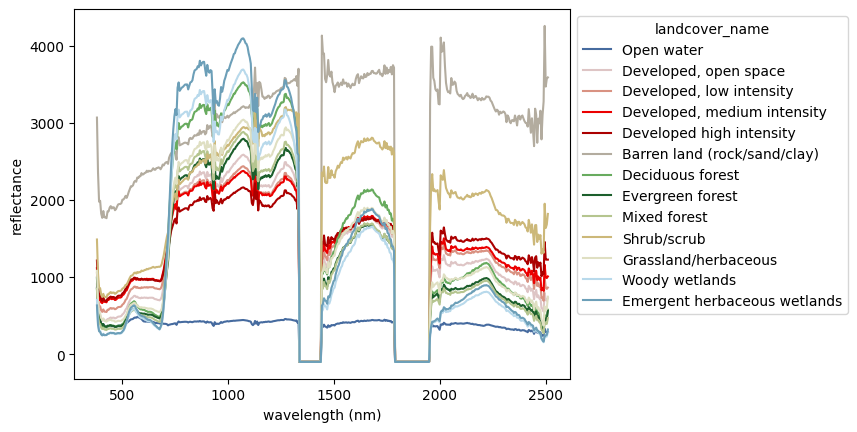

In [ ]:
# Plot spectra by landcover type
ax = sns.lineplot(data=df, x="wavelength (nm)", y="reflectance", hue="landcover_name", palette=colDict)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))




---



## Additional Resources

* **End-to-End Google Earth Engine**: If you'd like to continue exploring the Earth Engine processes and applications, <a href="https://courses.spatialthoughts.com/end-to-end-gee.html#automatic-conversion-of-javascript-code-to-python" target="_blank"> SpatialThoughts Course - Ujaval Gandhi </a> has some nice examples you can follow.

